In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,BatchNormalization

In [3]:
path = "fer2013/"

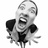

In [4]:
load_img(f"{path}/train/Angry/1003.jpg")

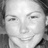

In [6]:
load_img(f"{path}/train/Happy/1.jpg")

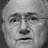

In [7]:
load_img(f"{path}/train/Fear/1.jpg")

In [8]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory(path+"train",
                                                       target_size=(48,48),
                                                       batch_size = 16,
                                                       class_mode = 'categorical',
                                                       shuffle=True)

Found 28709 images belonging to 7 classes.


In [10]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [12]:
np.unique(train_dataset.classes,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [13]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(path+"validation",
                                                  target_size=(48,48),
                                                  batch_size=1,
                                                  class_mode="categorical",
                                                  shuffle=False)

Found 3589 images belonging to 7 classes.


In [14]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [15]:
np.unique(test_dataset.classes,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([491,  55, 528, 879, 626, 594, 416]))

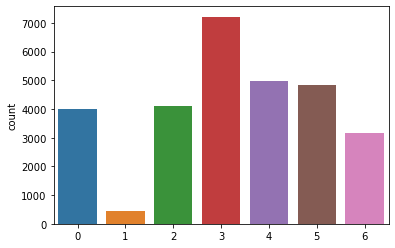

In [17]:
sns.countplot(x=train_dataset.classes);

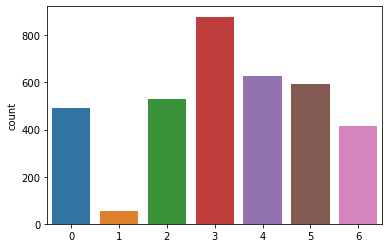

In [19]:
sns.countplot(x=test_dataset.classes);

In [24]:
num_detectors = 32
num_classes = 7
width,height = 48,48
epochs = 100

network = Sequential()

network.add(Conv2D(num_detectors,(3,3),activation="relu",padding="same",input_shape=(width,height,3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors,(3,3),activation="relu",padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors,(3,3),activation="relu",padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors,(3,3),activation="relu",padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(4*num_detectors,(3,3),activation="relu",padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(4*num_detectors,(3,3),activation="relu",padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(8*num_detectors,(3,3),activation="relu",padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(8*num_detectors,(3,3),activation="relu",padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2*num_detectors,activation="relu"))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2*num_detectors,activation="relu"))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes,activation="softmax"))
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_31 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 64)       

In [25]:
network.compile(optimizer="Adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [27]:
network.fit(train_dataset,epochs=10)

Epoch 1/10
1795/1795 [==============================] - 311s 173ms/step - loss: 1.8598 - accuracy: 0.2487
Epoch 2/10
1795/1795 [==============================] - 337s 188ms/step - loss: 1.5922 - accuracy: 0.3734
Epoch 3/10
1795/1795 [==============================] - 394s 219ms/step - loss: 1.4096 - accuracy: 0.4584
Epoch 4/10
1795/1795 [==============================] - 358s 199ms/step - loss: 1.3213 - accuracy: 0.4993
Epoch 5/10
1795/1795 [==============================] - 369s 205ms/step - loss: 1.2668 - accuracy: 0.5208
Epoch 6/10
1795/1795 [==============================] - 365s 203ms/step - loss: 1.2227 - accuracy: 0.5396
Epoch 7/10
1795/1795 [==============================] - 394s 219ms/step - loss: 1.1842 - accuracy: 0.5579
Epoch 8/10
1795/1795 [==============================] - 340s 189ms/step - loss: 1.1566 - accuracy: 0.5716
Epoch 9/10
1795/1795 [==============================] - 349s 195ms/step - loss: 1.1249 - accuracy: 0.5824
Epoch 10/10
1795/1795 [=======================

In [31]:
model_json = network.to_json()
with open("models/network_emotions.json","w") as json_file:
    json_file.write(model_json)

In [32]:
from tensorflow.keras.models import save_model

network_saved = save_model(network,"models/weights_emotions.hdf5")

In [38]:
with open("models/network_emotions.json","r") as json_file:
    loaded_model = json_file.read()

In [39]:
from tensorflow.keras.models import model_from_json

model = model_from_json(loaded_model)
model.load_weights("models/weights_emotions.hdf5")

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_31 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 64)       

In [45]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [46]:
model.evaluate(test_dataset)

3589/3589 [==============================] - 17s 5ms/step - loss: 1.3606 - accuracy: 0.5258


[1.3606083393096924, 0.5257731676101685]

In [47]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions,axis=1)
predictions[:5]

array([0, 0, 0, 5, 0])

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(test_dataset.classes,predictions)

0.5257731958762887

In [49]:
confusion_matrix(test_dataset.classes,predictions)

array([[234,   2,  17,  46,  69, 110,  13],
       [ 26,   7,   5,   6,   1,   7,   3],
       [ 79,   1,  83,  46,  94, 140,  85],
       [  8,   0,   1, 786,  27,  38,  19],
       [ 85,   2,  31, 171, 130, 134,  73],
       [ 45,   0,  21,  49, 128, 343,   8],
       [ 10,   0,  25,  40,  23,  14, 304]])

In [50]:
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48       491
           1       0.58      0.13      0.21        55
           2       0.45      0.16      0.23       528
           3       0.69      0.89      0.78       879
           4       0.28      0.21      0.24       626
           5       0.44      0.58      0.50       594
           6       0.60      0.73      0.66       416

    accuracy                           0.53      3589
   macro avg       0.50      0.45      0.44      3589
weighted avg       0.50      0.53      0.49      3589



### Predict single image

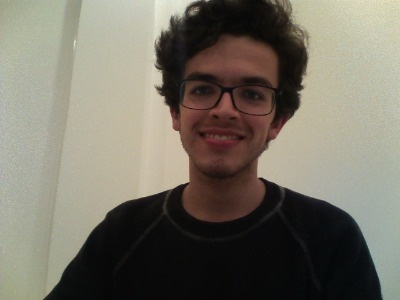

In [52]:
image = cv2.imread("Images/gabriel.png")
load_img("Images/gabriel.png")

In [53]:
image.shape

(300, 400, 3)

In [54]:
face_detector = cv2.CascadeClassifier("Cascades/haarcascade_frontalface_default.xml")

In [62]:
original_image = image.copy()
faces = face_detector.detectMultiScale(original_image)
faces

array([[162,  40, 128, 128]], dtype=int32)

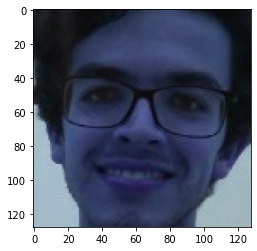

In [63]:
roi = image[40:40+128,162:162+128]
plt.imshow(roi);

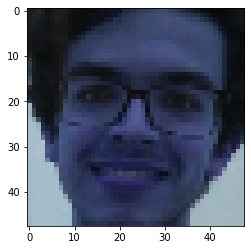

In [64]:
roi = cv2.resize(roi,(48,48))
plt.imshow(roi);

In [65]:
roi = roi/255
roi.shape

(48, 48, 3)

In [66]:
roi = np.expand_dims(roi,axis=0)
roi.shape

(1, 48, 48, 3)

In [69]:
prediction = model.predict(roi)
prediction = np.argmax(prediction,axis=1)
prediction

array([3])

In [70]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

### Predic nultiple images

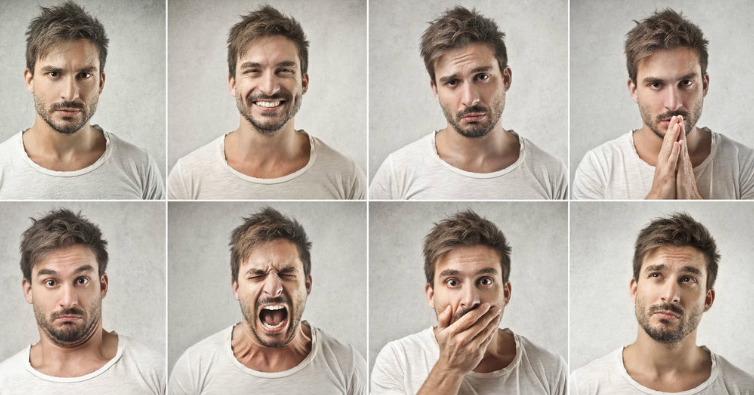

In [78]:
image = cv2.imread("Images/faces_emotions.png")
load_img("Images/faces_emotions.png")

In [79]:
faces = face_detector.detectMultiScale(image)
faces

array([[625,  49,  91,  91],
       [224,  35,  90,  90],
       [ 23,  41,  92,  92],
       [420,  43,  97,  97],
       [420, 242,  97,  97],
       [ 18, 243,  98,  98],
       [229, 242,  85,  85],
       [627, 241,  91,  91]], dtype=int32)

In [80]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [81]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

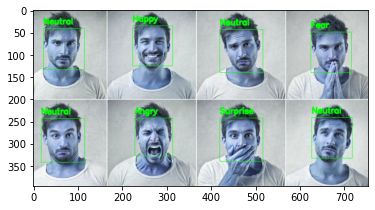

In [88]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),1)
    roi = image[y:y+h,x:x+w]
    roi = cv2.resize(roi,(48,48))
    roi = roi/255
    roi = np.expand_dims(roi,axis=0)
    prediction = model.predict(roi)
    prediction = np.argmax(prediction)
    emotion = emotions[prediction]
    cv2.putText(image,emotion,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,255,0),2,cv2.LINE_AA)
plt.imshow(image);

In [96]:
cap = cv2.VideoCapture('Videos/emotion_test01.mp4')
connected,video = cap.read()
print(connected,video.shape)

True (360, 640, 3)


In [99]:
save_path = "outputs/emotion_test01_result.avi"
fourcc = cv2.VideoWriter_fourcc(*"XVID")
fps = 24
output_video = cv2.VideoWriter(save_path,fourcc,fps,(video.shape[1],video.shape[0]))

In [100]:
while (cv2.waitKey(1)<0):
    connected,frame = cap.read()
    if not connected:
        break
    faces = face_detector.detectMultiScale(frame)
    if len(faces) > 0:
        for (x,y,w,h) in faces:
            frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            roi = frame[y:y+h,x:x+w]
            roi = cv2.resize(roi,(48,48))
            roi = roi/255
            roi = np.expand_dims(roi,axis=0)
            prediction = model.predict(roi)
            if prediction is not None:
                result = np.argmax(prediction)
                emotion = emotions[result]
                cv2.putText(frame,emotion,(x,y-10),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            0.5,(255,255,0),1,cv2.LINE_AA)
    output_video.write(frame)
print("End")
output_video.release()
cv2.destroyAllWindows()

End
